<a href="https://colab.research.google.com/github/001hazel/Phys-134/blob/main/Optical_Pumping_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optical Pumping Lab

### Low Field Zeeman Effect

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy as sp
import scipy.stats as stats
from google.colab import files

Data and associated error

In [2]:
frequency = np.array([0, 0.10427, 0.11426, 0.12446, 0.13406, 0.14409, 0.15471, 0.16469, 0.17450, 0.18410])
voltage_1 = np.array([0.360, 0.612, 0.624, 0.646, 0.672, 0.700, 0.728, 0.744, 0.772, 0.796])
error_1 = np.array([0.008, 0.009, 0.009, 0.009, 0.008, 0.012, 0.012, 0.010, 0.016, 0.012])
voltage_2 = np.array([0.360, 0.730, 0.754, 0.794, 0.832, 0.868, 0.912, 0.948, 0.968, 1.000])
error_2 = np.array([0.008, 0.010, 0.009, 0.012, 0.012, 0.012, 0.024, 0.018, 0.014, 0.016])

Linear model

In [3]:
def linear(x,A,B):
  return A*x + B

Fit curves of resonances

In [4]:
params_1,covariance_1 = scipy.optimize.curve_fit(linear,voltage_1,frequency,sigma=error_1,absolute_sigma=True)
params_2,covariance_2 = scipy.optimize.curve_fit(linear,voltage_2,frequency,sigma=error_2,absolute_sigma=True)

In [5]:
params_1

array([ 0.42530416, -0.15281536])

Model based on fit parameters

In [6]:

model_1 = linear(voltage_1,*params_1)
model_2 = linear(voltage_2,*params_2)

Plot of the resonances as function of current

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

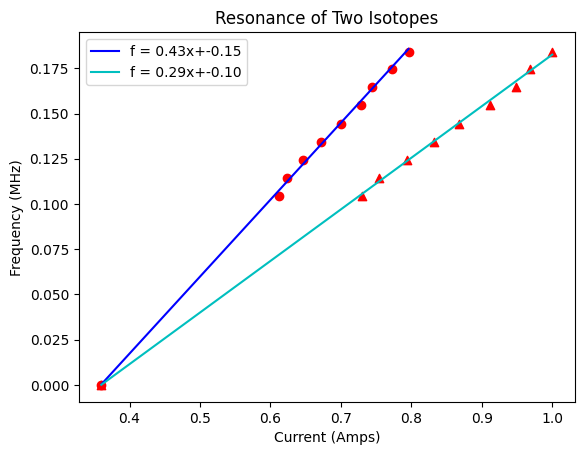

In [20]:
plt.figure()
plt.scatter(voltage_1,frequency,marker='o',color='red')
plt.scatter(voltage_2,frequency,marker='^',color='red')
plt.plot(voltage_1,model_1,color='blue',label='f = {:.2f}x+{:.2f}'.format(params_1[0],params_1[1]))
plt.plot(voltage_2,model_2,color='c',label='f = {:.2f}x+{:.2f}'.format(params_2[0],params_2[1]))
plt.title('Resonance of Two Isotopes')
plt.xlabel('Current (Amps)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.savefig('Low field resonance.png')
files.download('Low field resonance.png')
plt.show()

Ratio of the slopes

In [8]:
print(params_1[0],'/',params_2[0],'=',params_1[0]/params_2[0])

0.4253041586191716 / 0.2851453648642063 = 1.491534532997626


Measure of the residual field, based on the center of the zero field resonance

In [15]:
residual = 8.991*10**-3*0.360*11/0.1639
print(residual)

0.21723221476510066


In [16]:
res_error = 8.991*10**-3*11*0.008/0.1639
print(res_error)

0.00482738255033557


Calculating g-factors. Values for magnetic fields obtained from geometry of the coils at 134 kHz 

In [17]:
B1 = 8.991*10**-3*0.672*11/0.1639
B2 = 8.991*10**-3*11*0.832/0.1639
B1 = B1-residual
B2 = B2-residual
b_err_1 = 8.991*10**-3*0.008*11/0.1639
b_err_2 = 8.991*10**-3*11*0.012/0.1639
g_f1 = 0.13406/(B1*1.3996)
g_f2 = 0.13406/(B2*1.3996)
g_err_1 = np.sqrt((0.13406/(B1*1.3996))**2*b_err_1**2)
g_err_2 = np.sqrt((0.13406/(B2*1.3996))**2*b_err_2**2)
print(B1,B2)
print('g factors are',g_f1,'+/-',g_err_1,'and',g_f2,'+/-',g_err_2)

0.18826791946308727 0.28481557046979855
g factors are 0.5087670280370841 +/- 0.0024560130733323076 and 0.3363036287024795 +/- 0.0024351994032193237


In [19]:
##hypothesis testing for g-factors
test_1 = (g_f1-1/2)/g_err_1

cdf = stats.norm.cdf(test_1,0,1)

print ("CDF = ",stats.norm.cdf(test_1,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

test_2 = (g_f2-1/3)/g_err_2

cdf = stats.norm.cdf(test_2,0,1)

print ("CDF = ",stats.norm.cdf(test_2,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.9998212487992877
two tailed p-value =  0.0003575024014246253
CDF =  0.8887171250107491
two tailed p-value =  0.22256574997850187


In [22]:
def mag_field(f,g):
  return f/(g*1.3996)

Obtaining linear relation between sweep field magnitude and current through sweep coils

In [23]:
sweep_field = mag_field(frequency,g_f1)

params_3,covariance_3 = scipy.optimize.curve_fit(linear,voltage_1,sweep_field,sigma=error_1,absolute_sigma=True)

sweep_line = linear(voltage_1,*params_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

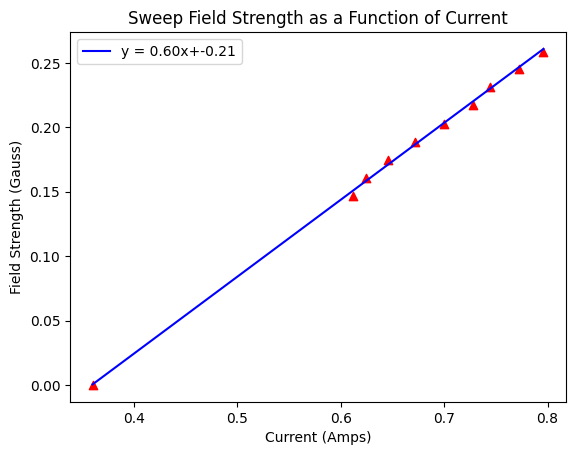

In [32]:
plt.figure()
plt.plot(voltage_1,sweep_line,color='blue',label = 'y = {:.2f}x+{:.2f}'.format(params_3[0],params_3[1]))
plt.scatter(voltage_1,sweep_field,marker='^',color='red')
plt.title('Sweep Field Strength as a Function of Current')
plt.xlabel('Current (Amps)')
plt.ylabel('Field Strength (Gauss)')
plt.legend()
plt.savefig('sweepfieldcalibration.png')
files.download('sweepfieldcalibration.png')
plt.show()

In [26]:
print(params_3[0],'+/-',np.sqrt(covariance_3[0,0]))

0.5972783011879983 +/- 0.024442424500887922


In [31]:
chisq = sum((sweep_field-sweep_line)**2/error_1**2)
ndf = len(sweep_field)-len(params_3)

print('Chi-square, degrees of freedom: ',chisq,ndf)
print('p-test value : ',1.-stats.chi2.cdf(chisq,df=ndf))

Chi-square, degrees of freedom:  0.6486685758297653 8
p-test value :  0.9996437987377014


Calculating contribution of main field, finding linear relation with current

In [34]:
frequency_2 = np.array([200.11,301.86,403.64,502.74,601.50,706.55,804.59,903.88])
sweep_current = np.array([0.664,0.736,0.816,0.776,0.656,0.688,0.856,0.736])
main_current = np.array([0.028,0.048,0.068,0.098,0.128,0.152,0.164,0.198])
expected_field = mag_field(frequency_2,g_f2)/1000
sweep_field = linear(sweep_current,*params_3)
main_field = expected_field - sweep_field
error_3 = np.ones(np.shape(main_current))*0.012


In [35]:
print(expected_field)

[0.42514131 0.64131305 0.85754854 1.06809026 1.27790963 1.50109236
 1.70938207 1.92032745]


In [36]:
params_4, covariance_4 = scipy.optimize.curve_fit(linear,main_current,main_field,sigma=error_3,absolute_sigma=True)

In [37]:
main_line = linear(main_current,*params_4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

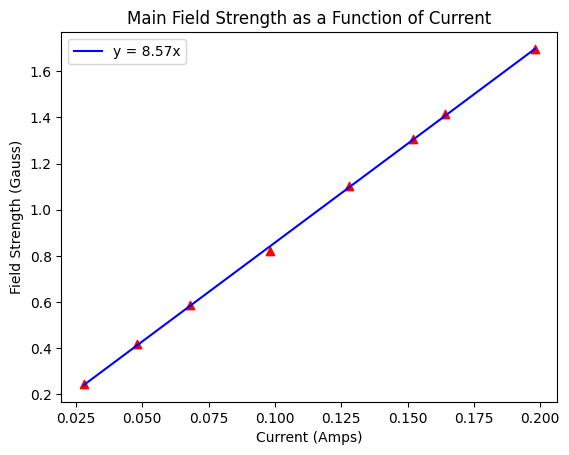

In [43]:
plt.figure()
plt.plot(main_current,main_line,color='blue',label = 'y = {:.2f}x'.format(params_4[0],params_4[1]))
plt.scatter(main_current,main_field,marker='^',color='red')
plt.xlabel('Current (Amps)')
plt.ylabel('Field Strength (Gauss)')
plt.title('Main Field Strength as a Function of Current')
plt.legend()
plt.savefig('mainfieldcontribution.png')
files.download('mainfieldcontribution.png')
plt.show()

In [ ]:
print(params_4)

[8.57026296e+00 1.10423574e-04]


In [40]:
chisq = sum((main_field-main_line)**2/error_3**2)
ndf = len(main_field)-len(params_4)

print('Chi-square, degrees of freedom: ',chisq,ndf)
print('p-test value : ',1.-stats.chi2.cdf(chisq,df=ndf))

Chi-square, degrees of freedom:  3.739388324383753 6
p-test value :  0.7118948414462039


### Quadratic Zeeman effect

Obtaining total fields for Rb 87 at a frequency of 4.99931 MHz, main field current of 0.8 amps

In [56]:
sweep_current_87 = np.array([0.744,0.768,0.784,0.800])
error_87 = np.array([0.009,0.009,0.009,0.009])
main_field_87 = params_4[0]*0.8
sweep_field_87 = linear(sweep_current_87,*params_3)
total_field_87 = sweep_field_87 + main_field_87
field_err_87 = np.sqrt((0.8*covariance_4[0,0])**2+(sweep_current_87*covariance_3[0,0])**2)
print(main_field_87)
print(sweep_field_87)
print(total_field_87)


6.856210370163819
[0.22976794 0.24410262 0.25365907 0.26321552]
[7.08597831 7.10031299 7.10986944 7.11942589]


In [55]:
book_field_87 = np.array([7.113,7.124,7.134,7.145]) #hypothesis testing
diff_1 = (book_field_87-total_field_87)
cdf = stats.norm.cdf(diff_1,0,1)

print ("CDF = ",cdf)

for i in cdf:
  if i>0.5:
    pvalue_2t = 2*(1-cdf)
  else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)
avg_p = sum(pvalue_2t)/4
print('average p-value =',avg_p)

CDF =  [0.51077878 0.50944887 0.50962577 0.51020148]
two tailed p-value =  [0.97844243 0.98110226 0.98074847 0.97959704]
average p-value = 0.9799725503213326


Obtaining total fields for Rb 85 at a frequency of 3.34 MHz, main field current of 0.8 amps

In [57]:
sweep_current_85 = np.array([0.736,0.768,0.784,0.816,0.848,0.864])
sweep_field_85 = linear(sweep_current_85,*params_3)
total_field_85 = sweep_field_85 + main_field_87
field_err_85 = np.sqrt((covariance_4[0,0])**2+(covariance_3[0,0])**2)
print(sweep_field_85)
print(total_field_85)

[0.22498971 0.24410262 0.25365907 0.27277197 0.29188488 0.30144133]
[7.08120008 7.10031299 7.10986944 7.12898234 7.14809525 7.1576517 ]


In [ ]:
book_field_85 = np.array([7.115,7.130,7.146,7.162,7.178,7.193]) #hypothesis testing
diff_2 = book_field_85-total_field_85
cdf = stats.norm.cdf(diff_2,0,1)

print ("CDF = ",cdf)

for i in cdf:
  if i>0.5:
    pvalue_2t = 2*(1-cdf)
  else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)
avg_p=sum(pvalue_2t)/6
print('average p-value =',avg_p)

CDF =  [0.51348165 0.51184167 0.51441087 0.51316975 0.51192849 0.51409899]
two tailed p-value =  [0.9730367  0.97631667 0.97117825 0.97366051 0.97614302 0.97180201]
average p-value = 0.9736895270449802


### Transient Effects

In [3]:
amplitude = np.array([0.34, 0.38, 0.5, 0.74])
period = np.array([6,3.6,3,2.2])
p_error = np.array([0.2,0.4,0.2,0.2])

In [4]:
def inverse(x,A,B):
  return A/x+B

In [5]:
params,covariance = scipy.optimize.curve_fit(inverse,amplitude,period,sigma=p_error,absolute_sigma=True)

In [13]:
fit_line = inverse(np.linspace(0.3,0.8,10),*params)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

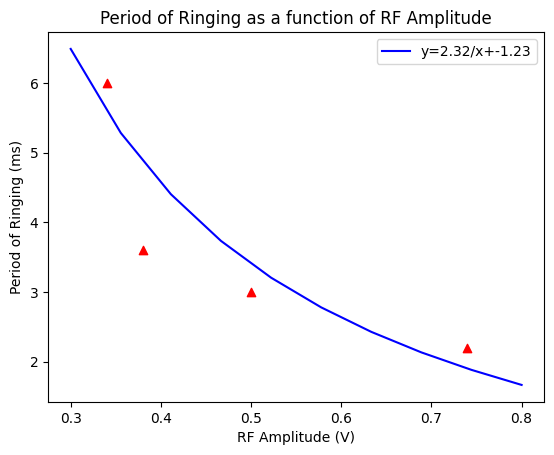

In [16]:
plt.figure()
plt.scatter(amplitude,period,color='red',marker='^')
plt.plot(np.linspace(0.3,0.8,10),fit_line,color='blue',label='y={:.2f}/x+{:.2f}'.format(params[0],params[1]))
plt.legend()
plt.title('Period of Ringing as a function of RF Amplitude')
plt.xlabel('RF Amplitude (V)')
plt.ylabel('Period of Ringing (ms)')
plt.savefig('ringing.png')
files.download('ringing.png')
plt.show()

In [19]:
#goodness of fit
fit_data = inverse(amplitude,*params)
chisq = sum((period-fit_data)**2/p_error**2)
ndf = 2

print('Chi-square, degrees of freedom',chisq,ndf,)
print('p-test value : ',1.-stats.chi2.cdf(chisq,df=ndf))


Chi-square, degrees of freedom 20.66440532317292 2
p-test value :  3.2567273258954366e-05
